<a id="import"></a>
# <center>Importación de módulos necesarios para la ejecución</center>

In [1]:
!apt-get update -y
!apt-get upgrade -y
!apt install libgl1-mesa-glx -y
!pip install opencv-python 
!pip install seaborn

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]      
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:5 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [1249 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [2239 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [873 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1156 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [26.0 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [51.2 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1170 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1812 kB]
Fetched 8912 

In [2]:
!pip install visualkeras
!pip install tf-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.6/994.6 KB 57.6 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.6/503.6 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 KB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 57.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 72.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.1

In [144]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from keras.applications.efficientnet import *

sns.set_style('darkgrid')

<a id="makedataframe"></a>
# <center>Lectura de imágenes y creación del dataframe</center>

In [ ]:
#!unzip -q "data.zip" -d "data/"

replace data/Achnanthidium/Achnanthes-rostellata-00048.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [145]:
sdir='./data_big'
dir = 'big'

max_samples = 400
min_samples = 10

def get_dataframe(sdir, dir):

    ht  = 0
    wt = 0
    samples = 0
    sample_count = 10
    filepaths = []
    labels = []
    classlist = os.listdir(sdir)


    for klass in classlist:

        classpath = os.path.join(sdir, klass)
        flist = os.listdir(classpath)

        for i, f in enumerate(flist):

            fpath=os.path.join(classpath,f)

            try: 
                img = plt.imread(fpath)
                shape = img.shape
                filepaths.append(fpath)
                labels.append(klass)


                if i < sample_count:
                    img = plt.imread(fpath)               
                    ht += img.shape[0]
                    wt += img.shape[1]
                    samples += 1
            except:
                print ('El archivo ', fpath, ' es una imagen inválida. ')

    filepaths = pd.Series(filepaths, name='filepaths')
    labels = pd.Series(labels, name='labels')

    df = pd.concat([filepaths, labels], axis = 1)
    class_count = len(df['labels'].unique())
    print('El df tiene ', class_count, ' clases.')

    groups = df.groupby('labels')
    print('{0:^30s} {1:^13s}'.format('Clase', 'Cantidad de imágenes'))

    for label in df['labels'].unique():
          group = groups.get_group(label)      
          print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

    wave = wt/samples
    have = ht/samples
    aspect_ratio = have/wave
    print ('Altura media: ' ,have, '  Anchura media: ', wave, '  Aspect ratio medio: ', aspect_ratio)
    
    return df

df = get_dataframe(sdir, dir)

El archivo  ./data_big/Navicula/Navicula-venerablis-02635.jpg  es una imagen inválida. 
El archivo  ./data_big/Navicula/Navicula-venerablis-02636.jpg  es una imagen inválida. 
El archivo  ./data_big/Navicula/Navicula-venerablis-02637.jpg  es una imagen inválida. 
El archivo  ./data_big/Achnanthidium/Achnanthidium_eutrophilum (1).db  es una imagen inválida. 
El df tiene  44  clases.
            Clase              Cantidad de imágenes
          Pinnularia                249     
         Cymbopleura                233     
           Adlafia                  28      
          Cyclotella                263     
          Tabellaria                91      
          Encyonema                 701     
          Gomphonema                452     
           Luticola                 201     
           Navicula                 621     
           Caloneis                 54      
          Brachysira                104     
          Surirella                 160     
         Encyonopsis   

<a id="trim"></a>
# <center>Trim del dataframe para balancear los datos</center>

In [147]:
def trim (df, max_size, min_size):
    
    column = 'labels'
    df = df.copy()
    original_class_count = len(list(df[column].unique()))   
    sample_list = [] 
    spare_list = []
    groups = df.groupby(column)
    
    for label in df[column].unique(): 
        
        group = groups.get_group(label)
        sample_count = len(group)    
        
        if sample_count > max_size :
            strat = group[column]
            samples, spare_data = train_test_split(group, train_size = max_size, shuffle = True, random_state = 123, stratify = strat)            
            sample_list.append(samples)
            spare_list.append(spare_data)
            
        elif sample_count >= min_size:
            sample_list.append(group)
            
    df = pd.concat(sample_list, axis = 0).reset_index(drop = True)
    spare_df = pd.concat(spare_list, axis = 0).reset_index(drop = True)
    
    final_class_count = len(list(df[column].unique())) 
    
    if final_class_count != original_class_count:
        print ('El dataframe se ha reducido. Número de clases original: ', original_class_count,' Número de clases actual: ', final_class_count)
        
        
    print("Dataframe trimeado:")
    groups = df.groupby('labels')
    print('{0:^30s} {1:^13s}'.format('Clase', 'Número de imágenes'))
    
    for label in df['labels'].unique():
          group = groups.get_group(label)      
          print('{0:^30s} {1:^13s}'.format(label, str(len(group))))
    
    print("Dataframe spare:")
    groups = spare_df.groupby('labels')
    print('{0:^30s} {1:^13s}'.format('Clase', 'Número de imágenes'))
        
    for label in spare_df['labels'].unique():
      group = groups.get_group(label)      
      print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

    return df, spare_df

In [148]:
trim_df, spare_df = trim(df, max_samples, min_samples)

El dataframe se ha reducido. Número de clases original:  44  Número de clases actual:  42
Dataframe trimeado:
            Clase              Número de imágenes
          Pinnularia                249     
         Cymbopleura                233     
           Adlafia                  28      
          Cyclotella                263     
          Tabellaria                91      
          Encyonema                 400     
          Gomphonema                400     
           Luticola                 201     
           Navicula                 400     
           Caloneis                 54      
          Brachysira                104     
          Surirella                 160     
         Encyonopsis                400     
           Diatoma                  267     
        Stephanodiscus              224     
          Frustulia                 136     
       Pseudostaurosira             216     
        Staurosirella               142     
          Neidiopsis          

<a id="split"></a>
# <center>Split de datos en entrenamiento, validación y test.</center>

In [149]:
train_df, dummy_df = train_test_split(trim_df, train_size = .8, shuffle = True, random_state = 123, stratify = trim_df['labels']) 
valid_df, test_df = train_test_split(dummy_df, train_size= .5, shuffle = True, random_state = 123, stratify = dummy_df['labels'])    

print('Tamaño del conjunto de ENTRENAMIENTO: ', len(train_df), '  \nTamaño del conjunto de TEST: ', len(test_df), '  \nTamaño del conjunto de VALIDACIÓN:  ', len(valid_df))

print("Dataframe train:")
classes = list(train_df['labels'].unique())
class_count = len(classes)
groups = train_df.groupby('labels')

print('{0:^30s} {1:^13s}'.format('Clase', 'Número de imágenes'))
for label in train_df['labels'].unique():
      group = groups.get_group(label)      
      print('{0:^30s} {1:^13s}'.format(label, str(len(group))))
    

    



Tamaño del conjunto de ENTRENAMIENTO:  7042   
Tamaño del conjunto de TEST:  881   
Tamaño del conjunto de VALIDACIÓN:   880
Dataframe train:
            Clase              Número de imágenes
          Frustulia                 109     
           Eunotia                  320     
           Navicula                 320     
        Achnanthidium               320     
         Aulacoseira                281     
          Encyonema                 320     
          Gomphonema                320     
          Craticula                 156     
         Encyonopsis                320     
          Cocconeis                 278     
           Eolimna                  320     
          Pinnularia                199     
          Surirella                 128     
         Cymbopleura                186     
           Amphora                  160     
          Cyclotella                210     
        Psammothidium               126     
       Pseudostaurosira             173    

In [151]:
test_df = pd.concat([test_df, spare_df])
test_df


            Clase              Número de imágenes
         Planothidium               300     
          Staurosira                171     
         Encyonopsis                320     
           Diatoma                  214     
           Cavinula                 67      
        Psammothidium               126     
        Achnanthidium               320     
          Gomphonema                320     
       Pseudostaurosira             173     
           Eolimna                  320     
          Fragilaria                320     
          Encyonema                 320     
        Stephanodiscus              179     
          Pinnularia                199     
          Stauroneis                274     
          Nitzschia                 320     
          Frustulia                 109     
          Cyclotella                210     
          Surirella                 128     
          Geissleria                50      
           Luticola                 161     
     

,filepaths,labels
6086,./data_big/Planothidium/Planothidium_lanceolat...,Planothidium
4079,./data_big/Staurosira/Staurosira_binodis (4).tif,Staurosira
2612,./data_big/Encyonopsis/Encyonopsis_alpina (25)...,Encyonopsis
3077,./data_big/Diatoma/Diatoma_vulgaris (84).tif,Diatoma
4591,./data_big/Cavinula/Cavinula-maculata-00480.jpg,Cavinula
...,...,...
1831,./data_big/Nitzschia/Nitzschia-angustata-03013...,Nitzschia
1832,./data_big/Nitzschia/IM001963.jpg,Nitzschia
1833,./data_big/Nitzschia/Nitzschia-soratensis-0283...,Nitzschia
1834,./data_big/Nitzschia/Nitzschia-regula-var.-rob...,Nitzschia


<a id="balance"></a>
# <center>Balanceo de train</center>

In [152]:
def balance(train_df, max_samples, min_samples, working_dir, image_size):
    
    column = 'labels'
    
    train_df = train_df.copy()       

    aug_dir = os.path.join(working_dir, 'aug')
    
    if os.path.isdir(aug_dir):
        shutil.rmtree(aug_dir)
        
    os.mkdir(aug_dir)
    
    for label in train_df['labels'].unique():    
        dir_path = os.path.join(aug_dir, label)    
        os.mkdir(dir_path)
        
     
    total = 0
    gen = ImageDataGenerator(rotation_range = 180, width_shift_range = .2, height_shift_range = .2, zoom_range = .1)
    
    groups=train_df.groupby('labels') # Agrupar por cada clase
    
    for label in train_df['labels'].unique():  # Por cada clase            
        group = groups.get_group(label)  # Nos quedamos con las imágenes de esa clase
        sample_count = len(group)   # Cuántas imágenes hay en esa clase

        if sample_count < max_samples: # Si hay menos imágenes:
            
            aug_img_count = 0
            delta = max_samples-sample_count  # Aumentamos el resto que falta.
            target_dir = os.path.join(aug_dir, label)  # Definimos dónde escribir las imágenes.  
            aug_gen = gen.flow_from_dataframe(group,  x_col = 'filepaths', y_col = None, target_size = image_size,
                                            class_mode = None, batch_size = 1, shuffle = False, 
                                            save_to_dir = target_dir, save_prefix = 'aug-', color_mode = 'rgb',
                                            save_format = 'jpg')
            while aug_img_count < delta:
                images = next(aug_gen)            
                aug_img_count += len(images)
                
            total += aug_img_count
            
    print('Imágenes totales creadas debido al aumento de datos:', total)
    
    # Creamos el dataset aumentado y lo unimos al de entrenamiento original.
    if total > 0:
        aug_fpaths = []
        aug_labels = []
        classlist = os.listdir(aug_dir)
        
        for klass in classlist:
            classpath = os.path.join(aug_dir, klass)     
            flist = os.listdir(classpath)    
            
            for f in flist:        
                fpath=os.path.join(classpath,f)         
                aug_fpaths.append(fpath)
                aug_labels.append(klass)
                
        Fseries = pd.Series(aug_fpaths, name='filepaths')
        Lseries = pd.Series(aug_labels, name='labels')
        aug_df = pd.concat([Fseries, Lseries], axis = 1)
        train_df = pd.concat([train_df,aug_df], axis = 0).reset_index(drop = True)
   
    print (list(train_df['labels'].value_counts()) )
    return train_df 

In [153]:
img_size = (200,200) # para effNetB5 es 456

In [154]:
working_dir = r'./'
train_df = balance(train_df, max_samples, min_samples, working_dir, img_size)

Found 109 validated image filenames.
Found 320 validated image filenames.
Found 320 validated image filenames.
Found 320 validated image filenames.
Found 281 validated image filenames.
Found 320 validated image filenames.
Found 320 validated image filenames.
Found 156 validated image filenames.
Found 320 validated image filenames.
Found 278 validated image filenames.
Found 320 validated image filenames.
Found 199 validated image filenames.
Found 128 validated image filenames.
Found 186 validated image filenames.
Found 160 validated image filenames.
Found 210 validated image filenames.
Found 126 validated image filenames.
Found 173 validated image filenames.
Found 161 validated image filenames.
Found 320 validated image filenames.
Found 179 validated image filenames.
Found 159 validated image filenames.
Found 320 validated image filenames.
Found 43 validated image filenames.
Found 300 validated image filenames.
Found 214 validated image filenames.
Found 47 validated image filenames.
Fou

<a id="generators"></a>
# <center>Creación de los datagen para pasar los datos a la red</center>

In [155]:
batch_size = 16

In [156]:
trgen = ImageDataGenerator(horizontal_flip = True,rotation_range = 20, width_shift_range = .2,
                                  height_shift_range = .2, zoom_range = .2 )

t_and_v_gen = ImageDataGenerator()
train_gen = trgen.flow_from_dataframe(train_df, x_col = 'filepaths', y_col = 'labels', target_size = img_size,
                                   class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
valid_gen = t_and_v_gen.flow_from_dataframe(valid_df, x_col = 'filepaths', y_col = 'labels', target_size = img_size,
                                   class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

# Para el test_gen tenemos que calcular el batch size y los pasos de manera que el batch_size X test_steps = nº de muestras en el set.
# Así aseguramos de usar todas las muestras una sola vez.

length = len(test_df)
test_batch_size = sorted([int(length/n) for n in range(1,length+1) if length % n == 0 and length/n <= 80],reverse = True)[0]  
test_steps = int(length/test_batch_size)
test_gen = t_and_v_gen.flow_from_dataframe(test_df, x_col = 'filepaths', y_col = 'labels', target_size = img_size,
                                   class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = test_batch_size)

classes = list(train_gen.class_indices.keys())
class_indices = list(train_gen.class_indices.values())
class_count = len(classes)
labels = test_gen.labels
print ('Imágenes del conjunto de test: ', test_steps, ' Número de clases: ', class_count)
print ('{0:^25s}{1:^12s}'.format('class name', 'class index'))

for klass, index in zip(classes, class_indices):
    print(f'{klass:^25s}{str(index):^12s}')

Found 16800 validated image filenames belonging to 42 classes.
Found 880 validated image filenames belonging to 42 classes.
Found 2717 validated image filenames belonging to 42 classes.
Imágenes del conjunto de test:  143  Número de clases:  42
       class name        class index 
      Achnanthidium           0      
         Adlafia              1      
         Amphora              2      
       Aulacoseira            3      
       Brachysira             4      
        Caloneis              5      
        Cavinula              6      
    Chamaepinnularia          7      
        Cocconeis             8      
        Craticula             9      
       Cyclotella             10     
       Cymbopleura            11     
        Diadesmis             12     
         Diatoma              13     
        Encyonema             14     
       Encyonopsis            15     
         Eolimna              16     
         Eunotia              17     
       Fragilaria             18 

<a id="show"></a>
# <center>Muestra de datos en pantalla (25 imágenes)</center>

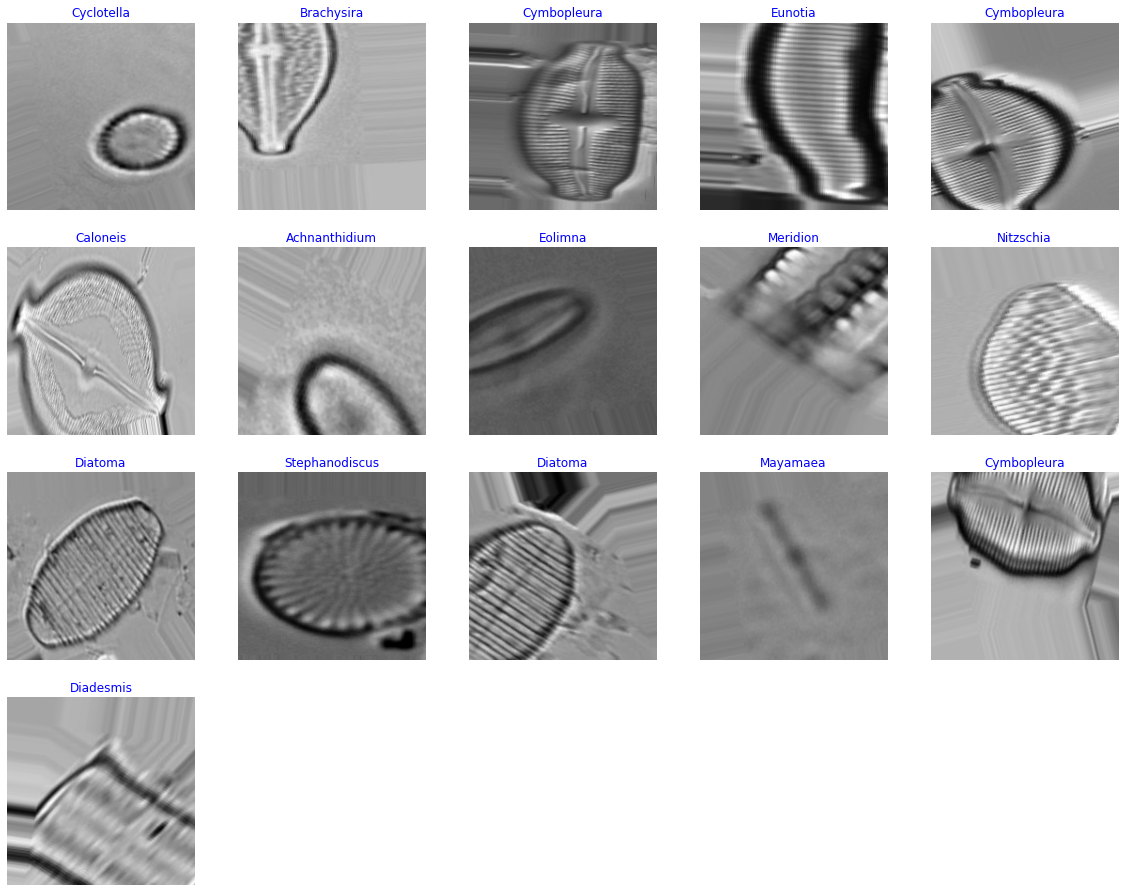

In [157]:
def show_image_samples(gen):
    
    t_dict = gen.class_indices
    classes = list(t_dict.keys())    
    images,labels = next(gen) # Cogemos un batch del datagen
    plt.figure(figsize = (20, 20))
    length = len(labels)
    
    if length < 25:   # Mostramos máximo 25 imágenes.
        r = length
    else:
        r = 25
        
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image = images[i] /255       
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color='blue', fontsize = 12)
        plt.axis('off')
        
    plt.show()
    
show_image_samples(train_gen)

<a id="model"></a>
# <center>Uso de EfficientNetB5</center>

In [158]:
img_shape = (img_size[0], img_size[1], 3)

# Hiperparámetros
lr = .001 
dropout = 0.0
lr = .001

model_name = 'EfficientNetB5'
base_model=tf.keras.applications.efficientnet.EfficientNetB5(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
#base_model = EfficientNetV2S(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 

base_model.trainable = True

x = base_model.output

# x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
# x = Dropout(rate=dropout, seed=123)(x)
"""
x = Dense(1024, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.3, seed=123)(x)
x = Dense(128, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)       
"""
output = Dense(class_count, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 

2022-05-24 18:37:34.981431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 18:37:35.084650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 18:37:35.085202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 18:37:35.087347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 18:37:35.087710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

115277824/115263384 [==============================] - 5s 0us/step


<a id="callback"></a>
# <center>Callbacks de Keras personalizados para alargar o cortar el entrenamiento.</center>

In [160]:
class ASK(keras.callbacks.Callback):
    
    def __init__ (self, model, epochs,  ask_epoch): # Inicializamos el callback
        super(ASK, self).__init__()
        self.model = model               
        self.ask_epoch = ask_epoch
        self.epochs = epochs
        self.ask = True # Al ponerse true pedimos al usuario que introduzca un número de épocas inicial
        
    def on_train_begin(self, logs = None): # Esto se ejecuta al principio del entrenamiento.
        
        if self.ask_epoch == 0: 
            print('Como mínimo se debe de entrenar 1 época, por lo que se entrenará 1.', flush=True)
            self.ask_epoch = 1
            
        if self.ask_epoch >= self.epochs: # Todavía no hay que preguntar
            self.ask=False # No se le pregunta al usuario
            
        if self.epochs == 1:
            self.ask = False # Sólo se ejecuta 1 época. 
            
        else:
            print('El entrenamiento seguirá hasta la época', ask_epoch,'. Posteriormente se le le pedirá') 
            print(' escribir H para parar o volver a insertar un número de épocas para seguir entrenando.')  
            
        self.start_time = time.time() # Medimos el tiempo desde que empezó el entrenamiento.
        
    def on_train_end(self, logs = None):   # Se ejecuta al final del entrenamiento  
        tr_duration = time.time() - self.start_time   # Mide el tiempo usado en el entrenamiento    
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'Tiempo total de entrenamiento {str(hours)} horas, {minutes:4.1f} minutos, {seconds:4.2f} segundos)'
        print (msg, flush=True) # Imprimimos el tiempo total de entrenamiento.
        
    def on_epoch_end(self, epoch, logs = None):  # Esta función se ejecuta AL FINAL DE CADA ÉPOCA
        
        if self.ask: 
            if epoch + 1 == self.ask_epoch: 
                
                print('\n Introduce H para parar el entrenamiento o un número de épocas con el que continuar entrenando.')
                
                ans = input()
                
                if ans == 'H' or ans =='h' or ans == '0': # Preguntamos condición de parada
                    print ('Has introducido ', ans, '; el entrenamiento parará en la época ', epoch+1, flush=True)
                    self.model.stop_training = True # Paramos el entrenamiento
                    
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('has introducido ', ans, ' épocas más. \n El entrenamiento continuará hasta la época ', self.ask_epoch, flush=True)

<a id="callbacks"></a>
# <center>Callbacks para controlar el LROnPlateau y el early Stopping

In [161]:
epochs = 40
ask_epoch = 5
ask = ASK(model, epochs,  ask_epoch)
rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 2, verbose = 1)
estop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 4, verbose = 1, restore_best_weights = True)
callbacks = [rlronp, estop, ask]

<a id="train"></a>
# <center>Train the model
### Entrenandolo desde cero conseguimos convergencia mucho más rápida y muchos mejores resultados

In [ ]:
history = model.fit(x = train_gen,  epochs = epochs, verbose = 1, callbacks = callbacks,  validation_data = valid_gen,
               validation_steps = None,  shuffle = False,  initial_epoch = 0)

El entrenamiento seguirá hasta la época 5 . Posteriormente se le le pedirá
 escribir H para parar o volver a insertar un número de épocas para seguir entrenando.
Epoch 1/40


2022-05-24 18:39:44.534496: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


1050/1050 [==============================] - 479s 431ms/step - loss: 1.1881 - accuracy: 0.6852 - val_loss: 0.4738 - val_accuracy: 0.8557 - lr: 0.0010
Epoch 2/40
1050/1050 [==============================] - 448s 426ms/step - loss: 0.4053 - accuracy: 0.8772 - val_loss: 0.4215 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 3/40
1050/1050 [==============================] - 448s 426ms/step - loss: 0.2426 - accuracy: 0.9248 - val_loss: 0.3427 - val_accuracy: 0.9159 - lr: 0.0010
Epoch 4/40
1050/1050 [==============================] - 449s 427ms/step - loss: 0.1696 - accuracy: 0.9467 - val_loss: 0.3059 - val_accuracy: 0.9239 - lr: 0.0010
Epoch 5/40
1050/1050 [==============================] - ETA: 0s - loss: 0.1249 - accuracy: 0.9611
 Introduce H para parar el entrenamiento o un número de épocas con el que continuar entrenando.


 2


you entered  2  Training will continue to epoch  7
1050/1050 [==============================] - 521s 496ms/step - loss: 0.1249 - accuracy: 0.9611 - val_loss: 0.3542 - val_accuracy: 0.9205 - lr: 0.0010
Epoch 6/40
1050/1050 [==============================] - ETA: 0s - loss: 0.1033 - accuracy: 0.9680
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1050/1050 [==============================] - 472s 449ms/step - loss: 0.1033 - accuracy: 0.9680 - val_loss: 0.3466 - val_accuracy: 0.9136 - lr: 0.0010
Epoch 7/40
1050/1050 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9843
 Introduce H para parar el entrenamiento o un número de épocas con el que continuar entrenando.


 3


you entered  3  Training will continue to epoch  10
1050/1050 [==============================] - 4695s 4s/step - loss: 0.0479 - accuracy: 0.9843 - val_loss: 0.2584 - val_accuracy: 0.9398 - lr: 5.0000e-04
Epoch 8/40
1050/1050 [==============================] - 449s 428ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.2662 - val_accuracy: 0.9330 - lr: 5.0000e-04
Epoch 9/40
1050/1050 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.9902
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1050/1050 [==============================] - 448s 427ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.2794 - val_accuracy: 0.9341 - lr: 5.0000e-04
Epoch 10/40
1050/1050 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9941
 Introduce H para parar el entrenamiento o un número de épocas con el que continuar entrenando.


 2


you entered  2  Training will continue to epoch  12
1050/1050 [==============================] - 628s 598ms/step - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.2445 - val_accuracy: 0.9409 - lr: 2.5000e-04
Epoch 11/40
1050/1050 [==============================] - 465s 442ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.2808 - val_accuracy: 0.9409 - lr: 2.5000e-04
Epoch 12/40
1050/1050 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9966
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

 Introduce H para parar el entrenamiento o un número de épocas con el que continuar entrenando.


 2


you entered  2  Training will continue to epoch  14
1050/1050 [==============================] - 2019s 2s/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.2704 - val_accuracy: 0.9352 - lr: 2.5000e-04
Epoch 13/40
1050/1050 [==============================] - 449s 428ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.2715 - val_accuracy: 0.9443 - lr: 1.2500e-04
Epoch 14/40
 300/1050 [=======>......................] - ETA: 5:16 - loss: 0.0110 - accuracy: 0.9967

<a id="plot"></a>
# <center>Mostramos los gráficos de entrenamiento y validación

In [21]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc = tr_data.history['accuracy']
    tloss = tr_data.history['loss']
    vacc = tr_data.history['val_accuracy']
    vloss = tr_data.history['val_loss']
    Epoch_count = len(tacc) + start_epoch
    Epochs = []
    
    for i in range (start_epoch, Epoch_count):
        Epochs.append(i+1)   
        
    index_loss = np.argmin(vloss) #  Época con menor error de validación.
    val_lowest = vloss[index_loss]
    index_acc = np.argmax(vacc)
    acc_highest = vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label = 'mejor época = '+ str(index_loss + 1 + start_epoch)
    vc_label = 'mejor época = '+ str(index_acc + 1 + start_epoch)
    fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
    
    axes[0].plot(Epochs,tloss, 'r', label = 'Training loss')
    axes[0].plot(Epochs,vloss,'g', label = 'Validation loss' )
    axes[0].scatter(index_loss + 1 + start_epoch, val_lowest, s = 150, c = 'blue', label = sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs, tacc, 'r', label = 'Training Accuracy')
    axes[1].plot (Epochs, vacc, 'g', label = 'Validation Accuracy')
    axes[1].scatter(index_acc + 1 + start_epoch,  acc_highest, s = 150, c = 'blue', label = vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    
    plt.tight_layout    
    plt.show()
    
tr_plot(history,0)

NameError: name 'history' is not defined

<a id="result"></a>
# <center> Realizamos la prediccion con los datos de text, creamos la matriz de confusión y mostramos los resultados.

881/881 [==============================] - 45s 47ms/step
there were 38 in 881 tests for an accuracy of  95.69


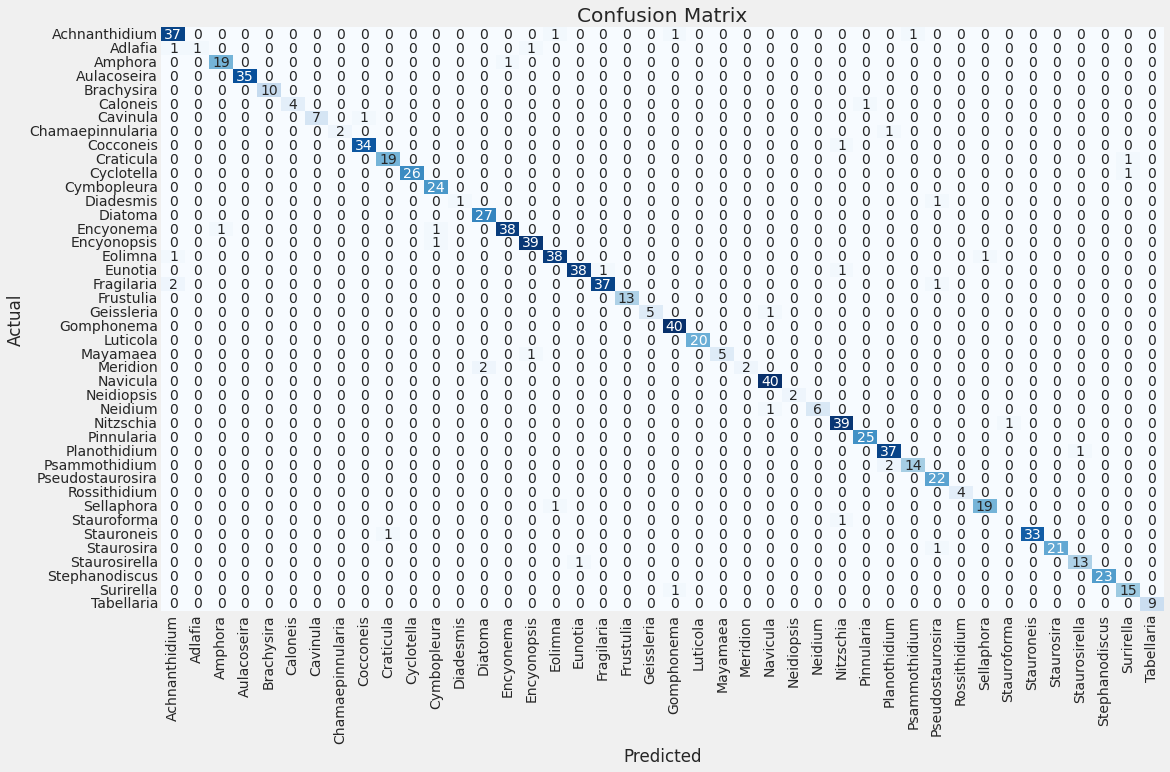

Classification Report:
----------------------
                   precision    recall  f1-score   support

   Achnanthidium     0.9024    0.9250    0.9136        40
         Adlafia     1.0000    0.3333    0.5000         3
         Amphora     0.9500    0.9500    0.9500        20
     Aulacoseira     1.0000    1.0000    1.0000        35
      Brachysira     1.0000    1.0000    1.0000        10
        Caloneis     1.0000    0.8000    0.8889         5
        Cavinula     1.0000    0.8750    0.9333         8
Chamaepinnularia     1.0000    0.6667    0.8000         3
       Cocconeis     0.9714    0.9714    0.9714        35
       Craticula     0.9500    0.9500    0.9500        20
      Cyclotella     1.0000    0.9630    0.9811        27
     Cymbopleura     0.9231    1.0000    0.9600        24
       Diadesmis     1.0000    0.5000    0.6667         2
         Diatoma     0.9310    1.0000    0.9643        27
       Encyonema     0.9744    0.9500    0.9620        40
     Encyonopsis     0.9

In [22]:
y_pred = []
y_true = test_gen.labels
errors = 0
preds  = model.predict(test_gen, steps = test_steps, verbose = 1) 
tests = len(preds)

for i, p in enumerate(preds):
        pred_index = np.argmax(p)         
        true_index = test_gen.labels[i]  
        if pred_index != true_index:                                       
            errors = errors + 1
        y_pred.append(pred_index)
        
acc = (1-errors/tests) * 100
print(f'Hay un total de {errors} errores en {tests} imágenes. \nAccuracy en test: {acc:6.2f}')

ypred = np.array(y_pred)
ytrue = np.array(y_true)
cm = confusion_matrix(ytrue, ypred)
plt.figure(figsize = (16, 10))
sns.heatmap(cm, annot = True, vmin = 0, fmt = 'g', cmap = 'Blues', cbar = False)       
plt.xticks(np.arange(class_count)+.5, classes, rotation = 90)
plt.yticks(np.arange(class_count)+.5, classes, rotation = 0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

clr = classification_report(y_true, y_pred, target_names = classes, digits = 4)
print("Classification Report:\n----------------------\n", clr)

<a id="save"></a>
# <center>Save the model

In [31]:
subject = model_name
acc = str((1 - errors / tests) * 100)
index = acc.rfind('.')
acc = acc[:index + 3]
save_id = subject + '_' + str(acc) + '_' + str(dir) +  '_' + str(max_samples) + ',' + str(min_samples) + '.h5' 
model_save_loc = os.path.join(working_dir, save_id)
model.save(model_save_loc)
print ('Modelo guardado con el nombre: ' , model_save_loc ) 

model was saved as  ./algae_95.68_big_400,10.h5
